In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.special as sp
import sympy
from IPython.display import Image
from matplotlib import rc

import warnings

import utils

warnings.simplefilter("ignore")

In [2]:
workdir = 'figures/conduit_flow'
utils.make_dir_if_missing(workdir)

In [3]:
labelsize = 14
figsize = (5, 4.5)
ext = "eps"
rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)
params = {
    'figure.figsize': figsize,
    # 'text.usetex' : True,
    'font.size' : 12,
    # 'font.family' : 'iopams',
    'axes.labelsize': labelsize,
    'legend.fontsize': 12,
    # 'text.latex.unicode': True,
}
plt.rcParams.update(params)

In [4]:
PATH = os.path.join("/home/lmolel/OneDrive/PhD/Figures/")

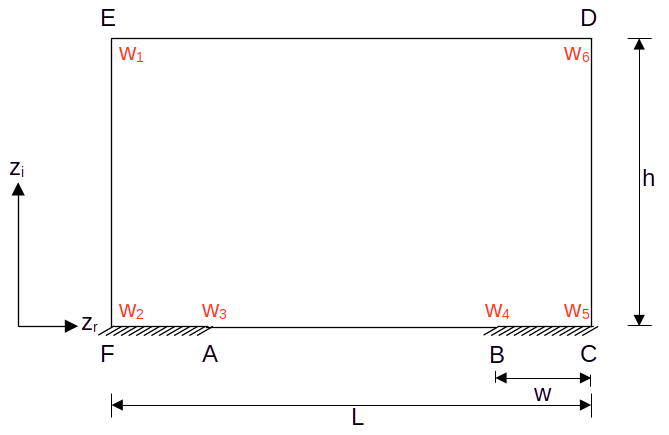

In [5]:
Image(filename=os.path.join(PATH, "conduit.png"))#, width=100, height=100)

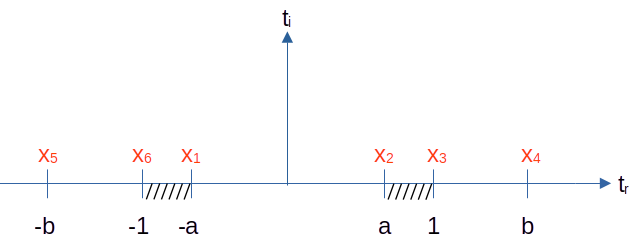

In [6]:
Image(filename=os.path.join(PATH, "conduit-mapping.png"))#, width=100, height=100)

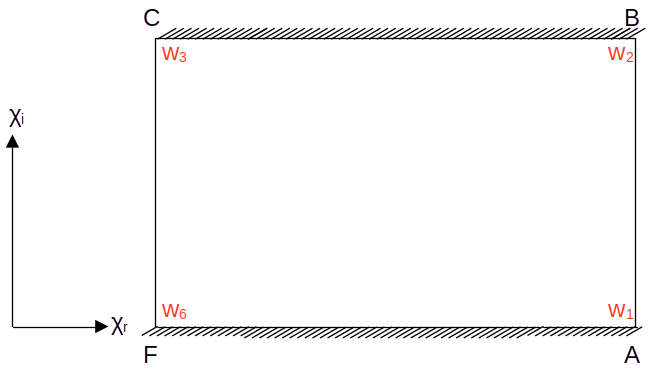

In [7]:
Image(filename=os.path.join(PATH, "conduit-2.png"))#, width=100, height=100)

## First Mapping

In the first mapping, we have:

\begin{equation*}
w = \int_{z_0}^z \frac{1}{(s + b)^{\frac{1}{2}} (s + 1)^{\frac{1}{2}} (s - b)^{\frac{1}{2}} (s - 1)^{\frac{1}{2}}}\mathrm{ds}
\end{equation*}

In the second mapping, we have:
\begin{equation*}
w = \int_{z_0}^z \frac{1}{(s + b)^{\frac{1}{2}} (s + a)^{\frac{1}{2}} (s - b)^{\frac{1}{2}} (s - a)^{\frac{1}{2}}}\mathrm{ds}
\end{equation*}

### Geometric ratios
\begin{equation*}
b = \frac{2H}{L}
\end{equation*}

\begin{equation*}
a = 1 - \frac{2w}{L}
\end{equation*}

In [8]:
def get_half_chi_re(a):
    lb = 0.5 * (1 + a)
    ub = 1
    x = sympy.Symbol('x', real=True)
    integ = sympy.Integral(1/((1 - x**2) * (x**2 - a**2)) ** 0.5, (x, lb, ub)).evalf()
    re = sympy.re(integ)
    im = sympy.im(integ)

    return re

def get_chi_im_max(a):
    x = sympy.Symbol('x', real=True)
    integ = sympy.Integral(1/((x**2 - 1) * (x**2 - a**2)) ** 0.5, (x, -1, 1)).evalf()
    re = sympy.re(integ)
    im = sympy.im(integ)

    return re

In [9]:
def Q(a, b):
    """
    Dimensionless flow rate
    """
    chi_im_max = get_chi_im_max(a)
    x = sympy.Symbol('x', real=True)
    integ = sympy.Integral((b**2 - x**2) ** 0.5 / (x**2 - a ** 2) ** 0.5, (x, a, 1)).evalf()
    re = sympy.re(integ)
    im = sympy.im(integ)

    return re / chi_im_max

In [10]:
def q(a, b, x):
    chi_im_max = get_chi_im_max(a)
    return (b**2 - x**2) ** 0.5 / (x**2 - a ** 2) ** 0.5 / chi_im_max

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


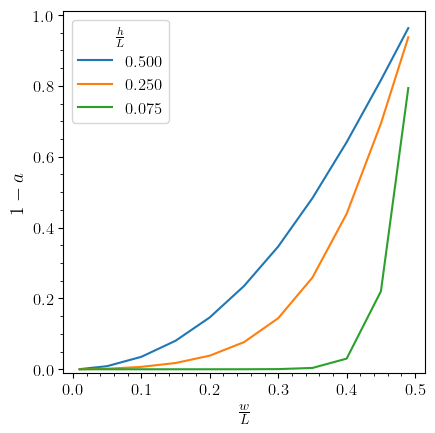

In [11]:
df = pd.read_csv("experimental/geometric-factors.csv")
fig, ax = plt.subplots()
df_seg = df[np.isclose(df['h_over_L'], 0.5)]
df_seg1 = df[np.isclose(df['h_over_L'], 0.25)]
df_seg2 = df[np.isclose(df['h_over_L'], 0.075)]
ax.plot(df_seg['w_over_L'], 1 - df_seg['a'], label='0.500');
ax.plot(df_seg1['w_over_L'], 1 - df_seg1['a'], label='0.250');
ax.plot(df_seg2['w_over_L'], 1 - df_seg2['a'], label='0.075');
ax.legend(title=r'$\frac{h}{L}$');
ax.set_box_aspect(1);
ax.set_xlabel(r'$\frac{w}{L}$');
ax.set_ylabel(r'$1 - a$');
ax.set_ylim([-0.01, 1.01]);
ax.minorticks_on();
plt.tight_layout();
plt.savefig(f'{workdir}/a-values.{ext}', format=ext)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


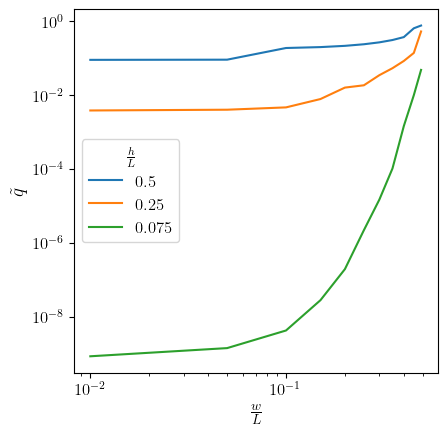

In [19]:
fig, ax = plt.subplots()
b_values = df_seg['b'].to_numpy()
h_over_L = df_seg['h_over_L'].to_numpy()
w_over_L = df_seg['w_over_L'].to_numpy()
a_values = df_seg['a'].to_numpy()
k_values = df_seg['k'].to_numpy()

q_values = []
k = k_values[0]
b = b_values[0]
for a in a_values:
    phi = np.arcsin(a)
    w = sp.ellipk(k**2) - sp.ellipkinc(phi, k**2)
    qbar = Q(a, b)/w
    q_values.append(qbar)
ax.plot(w_over_L, q_values, label=f'{h_over_L[0]}');

# new plot
b_values = df_seg1['b'].to_numpy()
h_over_L = df_seg1['h_over_L'].to_numpy()
w_over_L = df_seg1['w_over_L'].to_numpy()
a_values = df_seg1['a'].to_numpy()
k_values = df_seg1['k'].to_numpy()

q_values = []
k = k_values[0]
b = b_values[0]
for a in a_values:
    phi = np.arcsin(a)
    w = sp.ellipk(k**2) - sp.ellipkinc(phi, k**2)
    qbar = Q(a, b)/w
    q_values.append(qbar)
ax.plot(w_over_L, q_values, label=f'{h_over_L[0]}');

# new plot
b_values = df_seg2['b'].to_numpy()
h_over_L = df_seg2['h_over_L'].to_numpy()
w_over_L = df_seg2['w_over_L'].to_numpy()
a_values = df_seg2['a'].to_numpy()
k_values = df_seg2['k'].to_numpy()

q_values = []
k = k_values[0]
b = b_values[0]
for a in a_values:
    phi = np.arcsin(a)
    w = sp.ellipk(k**2) - sp.ellipkinc(phi, k**2)
    qbar = Q(a, b)/w
    q_values.append(qbar)
ax.plot(w_over_L, q_values, label=f'{h_over_L[0]}');

# formatting
ax.legend(title=r'$\frac{h}{L}$');
ax.set_box_aspect(1);
ax.set_xlabel(r'$\frac{w}{L}$');
ax.set_ylabel(r'$\tilde{q}$');
ax.minorticks_on();
ax.semilogx();
ax.semilogy();
plt.tight_layout();
plt.savefig(f'{workdir}/qtilde.{ext}', format=ext);

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


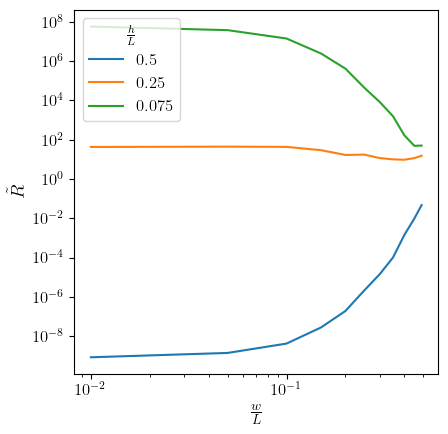

In [20]:
fig, ax = plt.subplots()
b_values = df_seg['b'].to_numpy()
h_over_L = df_seg['h_over_L'].to_numpy()
w_over_L = df_seg['w_over_L'].to_numpy()
a_values = df_seg['a'].to_numpy()
k_values = df_seg['k'].to_numpy()

r_values = []
k = k_values[0]
b = b_values[0]
for a in a_values:
    phi = np.arcsin(a)
    L_2w = 2 * sp.ellipkinc(phi, k**2)
    w = sp.ellipk(k**2) - sp.ellipkinc(phi, k**2)
    qtilde = Q(a, b)/w * L_2w
    r_values.append(1/qtilde)
ax.plot(w_over_L, q_values, label=f'{h_over_L[0]}');

# new plot
b_values = df_seg1['b'].to_numpy()
h_over_L = df_seg1['h_over_L'].to_numpy()
w_over_L = df_seg1['w_over_L'].to_numpy()
a_values = df_seg1['a'].to_numpy()
k_values = df_seg1['k'].to_numpy()

r_values = []
k = k_values[0]
b = b_values[0]
for a in a_values:
    phi = np.arcsin(a)
    L_2w = 2 * sp.ellipkinc(phi, k**2)
    w = sp.ellipk(k**2) - sp.ellipkinc(phi, k**2)
    qtilde = Q(a, b)/w * L_2w
    r_values.append(1/qtilde)
ax.plot(w_over_L, r_values, label=f'{h_over_L[0]}');

# new plot
b_values = df_seg2['b'].to_numpy()
h_over_L = df_seg2['h_over_L'].to_numpy()
w_over_L = df_seg2['w_over_L'].to_numpy()
a_values = df_seg2['a'].to_numpy()
k_values = df_seg2['k'].to_numpy()

r_values = []
k = k_values[0]
b = b_values[0]
for a in a_values:
    phi = np.arcsin(a)
    L_2w = 2 * sp.ellipkinc(phi, k**2)
    w = sp.ellipk(k**2) - sp.ellipkinc(phi, k**2)
    qtilde = Q(a, b)/w * L_2w
    r_values.append(1/qtilde)
ax.plot(w_over_L, r_values, label=f'{h_over_L[0]}');

# formatting
ax.legend(title=r'$\frac{h}{L}$');
ax.set_box_aspect(1);
ax.set_xlabel(r'$\frac{w}{L}$');
ax.set_ylabel(r'$\tilde{R}$');
ax.minorticks_on();
ax.semilogx();
ax.semilogy();
plt.tight_layout();
plt.savefig(f'{workdir}/rtilde.{ext}', format=ext);

In [16]:
# eps = 1e-9
# z_dist = np.linspace(a_values[0] - eps, 1, num=10001)
# q_loc = [q(a_values[0], b_values[0], z) for z in z_dist]

In [17]:
# fig, ax = plt.subplots()
# ax.plot(z_dist - a_values[0], q_loc);
# # ax.legend();
# ax.set_box_aspect(1);
# ax.set_xlabel(r'$\Vert z - z*\Vert$');
# ax.semilogx();
# # ax.semilogy();
# ax.minorticks_on()
# ax.set_ylabel(r'$\tilde{q}$');
# plt.tight_layout();